In [ ]:
!pip install scgen[tutorials] wget

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 88.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.2/380.2 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 94.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 95.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 104.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 83.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import logging
import scanpy as sc
import scgen

In [ ]:
!wget -O '/content/drive/My Drive/scGen/Epi_bcc.h5ad' 'https://datasets.cellxgene.cziscience.com/49fec199-80d2-4f10-ae46-5d307db16ab9.h5ad'

--2024-04-30 12:11:45--  https://datasets.cellxgene.cziscience.com/49fec199-80d2-4f10-ae46-5d307db16ab9.h5ad
Resolving datasets.cellxgene.cziscience.com (datasets.cellxgene.cziscience.com)... 13.32.87.125, 13.32.87.99, 13.32.87.43, ...
Connecting to datasets.cellxgene.cziscience.com (datasets.cellxgene.cziscience.com)|13.32.87.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94550694 (90M) [binary/octet-stream]
Saving to: ‘/content/drive/My Drive/scGen/Epi_bcc.h5ad’

/content/drive/My D 100%[===================>]  90.17M  37.4MB/s    in 2.4s    

2024-04-30 12:11:48 (37.4 MB/s) - ‘/content/drive/My Drive/scGen/Epi_bcc.h5ad’ saved [94550694/94550694]



In [ ]:
train = sc.read("/content/drive/My Drive/scGen/Epi_bcc.h5ad")

In [ ]:
train

AnnData object with n_obs × n_vars = 9841 × 27405
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', '00_conditions', '02_group', '04_celltypes', '05_subcelltypes', '06_seurat_clusters', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_type', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'

In [ ]:
train.obs['disease'].value_counts()

disease
normal                  7101
basal cell carcinoma    2740
Name: count, dtype: int64

In [ ]:
train.obs

,nCount_RNA,nFeature_RNA,percent.mt,00_conditions,02_group,04_celltypes,05_subcelltypes,06_seurat_clusters,assay_ontology_term_id,cell_type_ontology_term_id,...,tissue_ontology_term_id,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
bcc_AAAGATGAGAGCAATT-1_1,2887.0,1229,3.221337,healthy,body,Suprabasal K,IFE spinous K,1,EFO:0009899,CL:2000092,...,UBERON:0001416,hair follicular keratinocyte,10x 3' v2,normal,Homo sapiens,male,skin of abdomen,unknown,human adult stage,Y__|(?HLfx
bcc_AACTGGTGTACAAGTA-1_1,3956.0,1329,4.802831,healthy,body,Suprabasal K,IFE basal K,2,EFO:0009899,CL:0002187,...,UBERON:0001416,basal cell of epidermis,10x 3' v2,normal,Homo sapiens,male,skin of abdomen,unknown,human adult stage,_>KLglfi+=
bcc_AAGCCGCTCCAGAAGG-1_1,3698.0,1256,4.245538,healthy,body,Suprabasal K,IFE basal K,2,EFO:0009899,CL:0002187,...,UBERON:0001416,basal cell of epidermis,10x 3' v2,normal,Homo sapiens,male,skin of abdomen,unknown,human adult stage,9BM8Z>`;h_
bcc_AAGGTTCAGGTTCCTA-1_1,2037.0,762,0.147275,healthy,body,Suprabasal K,IFE spinous K,1,EFO:0009899,CL:2000092,...,UBERON:0001416,hair follicular keratinocyte,10x 3' v2,normal,Homo sapiens,male,skin of abdomen,unknown,human adult stage,;mEB7kUEkt
bcc_ACATACGTCAGATAAG-1_1,7270.0,1900,3.658872,healthy,body,Suprabasal K,IFE basal K,2,EFO:0009899,CL:0002187,...,UBERON:0001416,basal cell of epidermis,10x 3' v2,normal,Homo sapiens,male,skin of abdomen,unknown,human adult stage,YLn@}*S+j~
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ife_TTTGGAGGTTGGTAGG-1,571.0,442,0.175131,healthy,face,N/A (microdissected data),Transitional K,3,EFO:0009922,CL:2000092,...,UBERON:0000403,hair follicular keratinocyte,10x 3' v3,normal,Homo sapiens,female,scalp,unknown,54-year-old human stage,`Y9OwO<>6d
ife_TTTGGTTCACTACACA-1,11141.0,2884,0.430841,healthy,face,N/A (microdissected data),Outer bulb K,4,EFO:0009922,CL:2000092,...,UBERON:0000403,hair follicular keratinocyte,10x 3' v3,normal,Homo sapiens,female,scalp,unknown,54-year-old human stage,{-tFvHrOwP
ife_TTTGGTTGTGCCTGCA-1,11746.0,2779,2.843521,healthy,face,N/A (microdissected data),Outer bulb K,4,EFO:0009922,CL:2000092,...,UBERON:0000403,hair follicular keratinocyte,10x 3' v3,normal,Homo sapiens,female,scalp,unknown,54-year-old human stage,<vNkogA;N$
ife_TTTGGTTTCGTTACCC-1,2844.0,998,1.793249,healthy,face,N/A (microdissected data),Granular K,9,EFO:0009922,CL:0002189,...,UBERON:0000403,granular cell of epidermis,10x 3' v3,normal,Homo sapiens,female,scalp,unknown,54-year-old human stage,z#y1LR&zTy


<ipython-input-16-b3e833958c56>:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


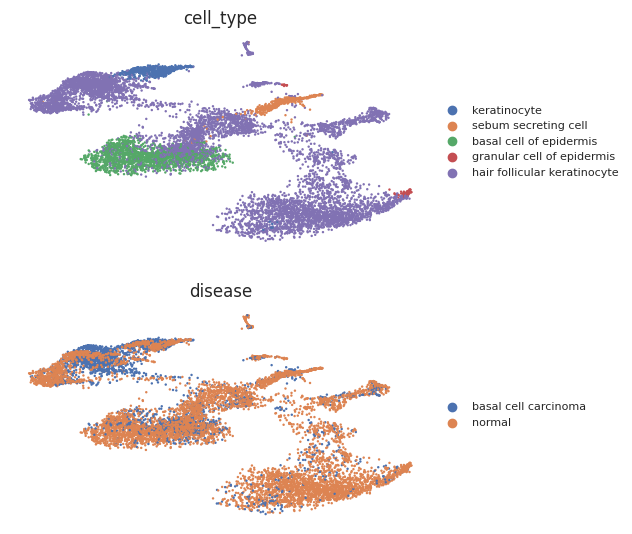

<Figure size 500x300 with 0 Axes>

In [ ]:
from matplotlib.pyplot import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 5, 3
sc.pl.umap(train, color=['cell_type', 'disease'], legend_fontsize=8, show=False, frameon=False, ncols=1)
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/scGen/Results/Epi_bcc/Epi_bcc_withBCEpng')

In [ ]:
train_new = train[~((train.obs["cell_type"] == "basal cell of epidermis") &
                    (train.obs["disease"] == "basal cell carcinoma"))].copy()

In [ ]:
train_new

NameError: name 'train_new' is not defined

<ipython-input-17-93a4a8db759c>:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


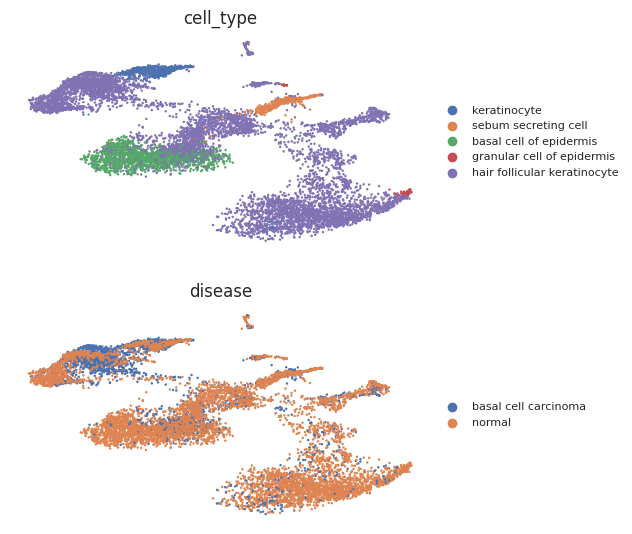

<Figure size 500x300 with 0 Axes>

In [ ]:
from matplotlib.pyplot import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 5, 3
sc.pl.umap(train_new, color=['cell_type', 'disease'], legend_fontsize=8, show=False, frameon=False, ncols=1)
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/scGen/Results/Epi_bcc/Epi_bcc_withoutBCEpng')

In [ ]:
scgen.SCGEN.setup_anndata(train_new, batch_key="disease", labels_key="cell_type")

In [ ]:
model = scgen.SCGEN(train_new)
model.save("/content/drive/MyDrive/scGen/saved_models/Epi_bcc.pt", overwrite=True)

In [ ]:
model.train(
    max_epochs=100,
    batch_size=32,
    early_stopping=True,
    early_stopping_patience=100
)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 100/100: 100%|██████████| 100/100 [12:44<00:00,  7.29s/it, v_num=1, train_loss_step=846, train_loss_epoch=754]

INFO: `Trainer.fit` stopped: `max_epochs=100` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [12:44<00:00,  7.64s/it, v_num=1, train_loss_step=846, train_loss_epoch=754]


In [ ]:
model = scgen.SCGEN.load("/content/drive/MyDrive/scGen/saved_models/Epi_bcc.pt", train_new)

INFO     File /content/drive/MyDrive/scGen/saved_models/Epi_bcc.pt/model.pt already downloaded                     


In [ ]:
model.save("/content/drive/MyDrive/scGen/saved_models/Epi_bcc_100epochs.pt", overwrite=True)

In [ ]:
latent_X = model.get_latent_representation()
latent_adata = sc.AnnData(X=latent_X, obs=train_new.obs.copy())
latent_adata.write('/content/drive/MyDrive/scGen/latentspace_Epi_bcc.h5ad', compression='lzf')

In [ ]:
sc.settings.figdir = '/content/drive/MyDrive/scGen/Results/Epi_bcc'

         Falling back to preprocessing with `sc.pp.pca` and default params.


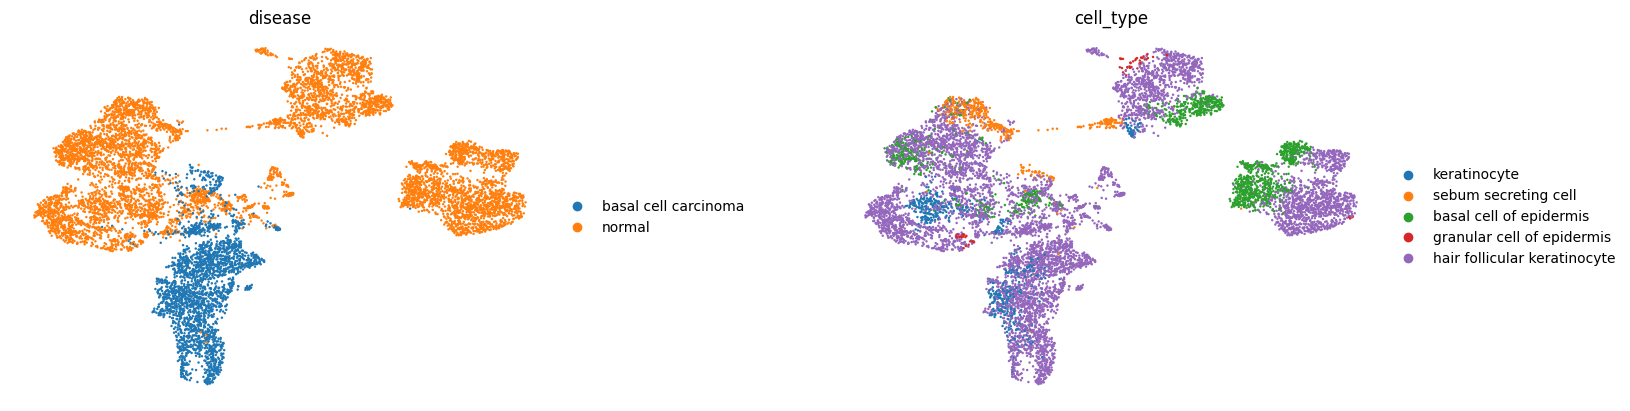

In [ ]:
sc.pp.neighbors(latent_adata)
sc.tl.umap(latent_adata)
sc.pl.umap(latent_adata, color=['disease', 'cell_type'], wspace=0.4, frameon=False,
           save='latentspace_Epi_bcc.pdf')

In [ ]:
pred, delta = model.predict(
    ctrl_key='normal',
    stim_key='basal cell carcinoma',
    celltype_to_predict='basal cell of epidermis'
)
pred.obs['disease'] = 'pred'
pred.write('/content/drive/MyDrive/scGen/Results/Epi_bcc.h5ad', compression='lzf')

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


In [ ]:
pred.obs

,nCount_RNA,nFeature_RNA,percent.mt,00_conditions,02_group,04_celltypes,05_subcelltypes,06_seurat_clusters,assay_ontology_term_id,cell_type_ontology_term_id,...,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid,_scvi_batch,_scvi_labels
bcc_AACTGGTGTACAAGTA-1_1,3956.0,1329,4.802831,healthy,body,Suprabasal K,IFE basal K,2,EFO:0009899,CL:0002187,...,10x 3' v2,pred,Homo sapiens,male,skin of abdomen,unknown,human adult stage,_>KLglfi+=,1,2
bcc_AAGCCGCTCCAGAAGG-1_1,3698.0,1256,4.245538,healthy,body,Suprabasal K,IFE basal K,2,EFO:0009899,CL:0002187,...,10x 3' v2,pred,Homo sapiens,male,skin of abdomen,unknown,human adult stage,9BM8Z>`;h_,1,2
bcc_ACATACGTCAGATAAG-1_1,7270.0,1900,3.658872,healthy,body,Suprabasal K,IFE basal K,2,EFO:0009899,CL:0002187,...,10x 3' v2,pred,Homo sapiens,male,skin of abdomen,unknown,human adult stage,YLn@}*S+j~,1,2
bcc_ACTGTCCAGTATCTCG-1_1,6230.0,1551,3.932584,healthy,body,Suprabasal K,IFE basal K,2,EFO:0009899,CL:0002187,...,10x 3' v2,pred,Homo sapiens,male,skin of abdomen,unknown,human adult stage,>-SpO1H_Q2,1,2
bcc_AGACGTTAGGCAGGTT-1_1,5228.0,1364,3.576894,healthy,body,Suprabasal K,IFE basal K,2,EFO:0009899,CL:0002187,...,10x 3' v2,pred,Homo sapiens,male,skin of abdomen,unknown,human adult stage,hZ}|LtU(%;,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ife_TTGCTGCGTTATTCTC-1,10412.0,2391,7.212831,healthy,face,N/A (microdissected data),IFE basal K,2,EFO:0009922,CL:0002187,...,10x 3' v3,pred,Homo sapiens,female,scalp,unknown,54-year-old human stage,c0oig87+-L,1,2
ife_TTGGGATGTGACCGTC-1,6317.0,1863,9.514009,healthy,face,N/A (microdissected data),IFE basal K,2,EFO:0009922,CL:0002187,...,10x 3' v3,pred,Homo sapiens,female,scalp,unknown,54-year-old human stage,{roH_nh~Zk,1,2
ife_TTGGGCGTCCCAATAG-1,10412.0,2591,4.321936,healthy,face,N/A (microdissected data),IFE basal K,2,EFO:0009922,CL:0002187,...,10x 3' v3,pred,Homo sapiens,female,scalp,unknown,54-year-old human stage,E~KCp$>ZA3,1,2
ife_TTTATGCTCGGTCATA-1,4603.0,1459,4.475342,healthy,face,N/A (microdissected data),IFE basal K,2,EFO:0009922,CL:0002187,...,10x 3' v3,pred,Homo sapiens,female,scalp,unknown,54-year-old human stage,mdMXD)2G)b,1,2


In [ ]:
ctrl_adata = train[((train.obs['cell_type'] == 'basal cell of epidermis') & (train.obs['disease'] == 'normal'))]
stim_adata = train[((train.obs['cell_type'] == 'basal cell of epidermis') & (train.obs['disease'] == 'basal cell carcinoma'))]

In [ ]:
ctrl_adata

View of AnnData object with n_obs × n_vars = 1504 × 27405
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', '00_conditions', '02_group', '04_celltypes', '05_subcelltypes', '06_seurat_clusters', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_type', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'

In [ ]:
stim_adata

View of AnnData object with n_obs × n_vars = 159 × 27405
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', '00_conditions', '02_group', '04_celltypes', '05_subcelltypes', '06_seurat_clusters', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_type', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'

In [ ]:
eval_adata = ctrl_adata.concatenate(stim_adata, pred)

<ipython-input-16-3baaa4d238ab>:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  eval_adata = ctrl_adata.concatenate(stim_adata, pred)
/usr/local/lib/python3.10/dist-packages/anndata/_core/merge.py:1357: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


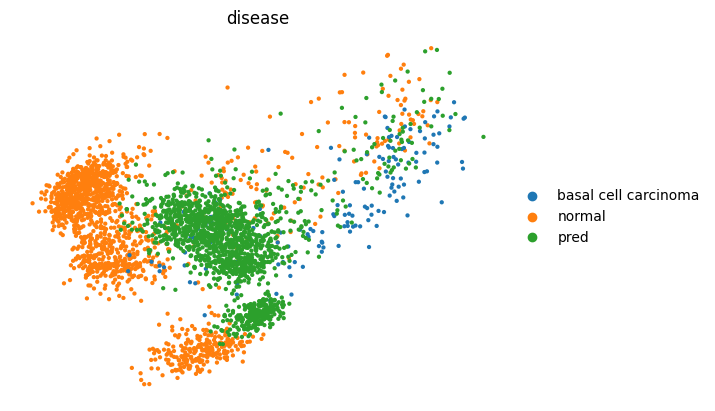

In [ ]:
sc.tl.pca(eval_adata)
sc.pl.pca(eval_adata, color="disease", frameon=False,
           save='pred_stim_Epi_bcc.pdf')

In [ ]:
eval_adata1 = eval_adata[~(eval_adata.obs["disease"] == "pred")].copy()
eval_adata2 = eval_adata[~(eval_adata.obs["disease"] == "basal cell carcinoma")].copy()

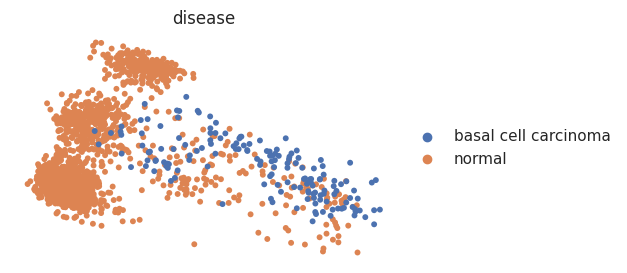

In [ ]:
sc.tl.pca(eval_adata1)
sc.pl.pca(eval_adata1, color="disease", frameon=False,
           save='pred_stim_Epi_bcc1.pdf')

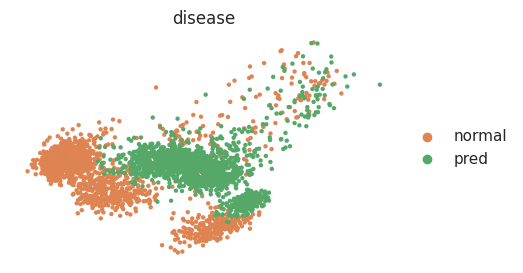

In [ ]:
sc.tl.pca(eval_adata2)
sc.pl.pca(eval_adata2, color="disease", frameon=False,
           save='pred_stim_Epi_bcc2.pdf')

In [ ]:
BCE = train[train.obs["cell_type"] =="basal cell of epidermis"]

In [ ]:
sc.tl.rank_genes_groups(BCE, groupby="disease", method="wilcoxon")
diff_genes = BCE.uns["rank_genes_groups"]["names"]["basal cell carcinoma"]
print(diff_genes)

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


['ENSG00000251562' 'ENSG00000128422' 'ENSG00000124766' ...
 'ENSG00000147604' 'ENSG00000124614' 'ENSG00000100316']


AttributeError: FancyArrowPatch.set() got an unexpected keyword argument 'force_points'

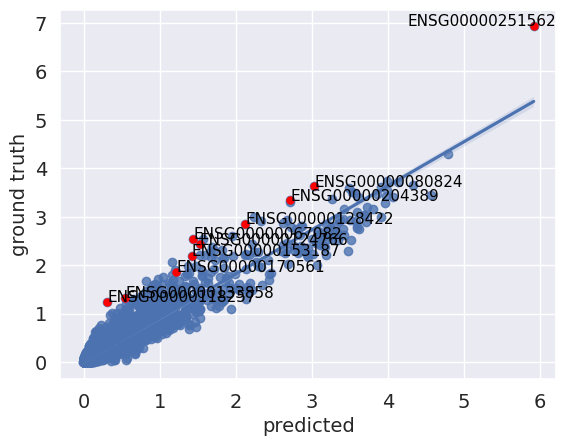

In [ ]:
r2_value = model.reg_mean_plot(
    eval_adata,
    axis_keys={"x": "pred", "y": "basal cell carcinoma"},
    gene_list=diff_genes[:10],
    labels={"x": "predicted", "y": "ground truth"},
    path_to_save="Epi_bcc_reg_mean1.pdf",
    show=True,
    legend=False
)
Figsize(10, 10)